# Métricas de Regressão
___
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error
* R2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

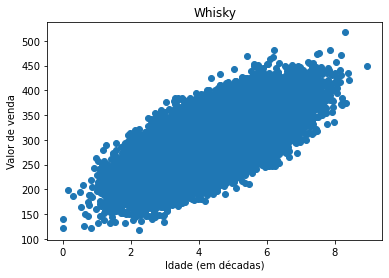

In [48]:
x,y = make_regression(n_samples=100000,n_features=1,n_informative=1,bias=300,noise=30,random_state=42,tail_strength=0.8,shuffle=True)
x += x.min()*-1
f, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.show()

In [49]:
np.corrcoef(x.reshape(1,-1),y)

array([[1.        , 0.70082469],
       [0.70082469, 1.        ]])

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [51]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(80000, 1) (80000,)
(20000, 1) (20000,)


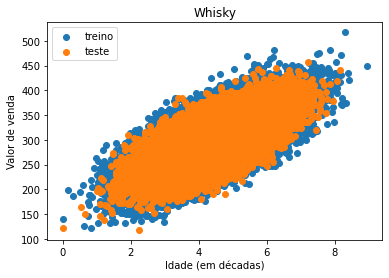

In [52]:
f, ax = plt.subplots()
ax.scatter(x_train,y_train,color='tab:blue',label='treino')
ax.scatter(x_test,y_test,color='tab:orange',label='teste')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

# Modelagem

In [53]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(x_test)

# Mean Absolute Error

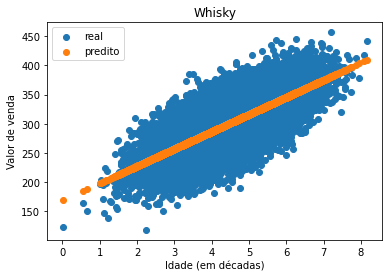

In [55]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

![mae](https://miro.medium.com/max/630/1*OVlFLnMwHDx08PHzqlBDag.gif)

In [56]:
y_test

array([324.33267006, 342.37456978, 275.01818811, ..., 268.8709553 ,
       324.91693858, 340.11597343])

In [57]:
y_pred

array([260.88904573, 324.2416004 , 299.04890766, ..., 283.5289876 ,
       345.01887925, 352.78978609])

In [58]:
res = y_test - y_pred
res

array([ 63.44362432,  18.13296938, -24.03071956, ..., -14.6580323 ,
       -20.10194067, -12.67381266])

In [59]:
res_abs = np.abs(res)
res_abs

array([63.44362432, 18.13296938, 24.03071956, ..., 14.6580323 ,
       20.10194067, 12.67381266])

In [60]:
np.mean(res_abs)

24.082315131188057

In [61]:
mean_absolute_error(y_test,y_pred)

24.082315131188057

In [62]:
np.mean(res_abs) == mean_absolute_error(y_test,y_pred)

True

## Mean Squared Error

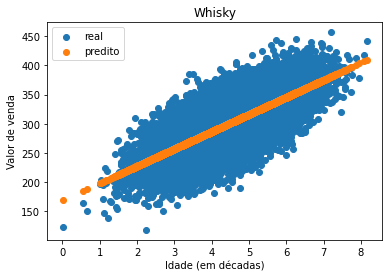

In [63]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

![mse](https://miro.medium.com/max/1198/1*BtVajQNj29LkVySEWR_4ww.png)

In [64]:
(y_test - y_pred)**2

array([4025.0934672 ,  328.80457859,  577.47548237, ...,  214.85791085,
        404.08801853,  160.62552738])

In [65]:
np.mean((y_test - y_pred)**2)

904.8017101455138

In [66]:
mse = mean_squared_error(y_test,y_pred)
mse

904.8017101455138

In [67]:
np.mean((y_test - y_pred)**2) == mean_squared_error(y_test,y_pred)

True

# Root Mean Squared Error

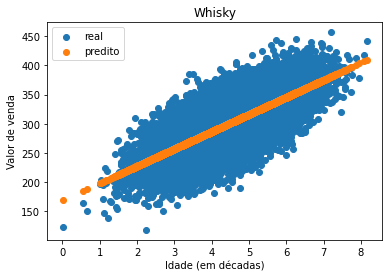

In [68]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

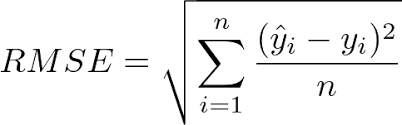

In [69]:
mse**(1/2)

30.079922043541167

In [70]:
mean_squared_error(y_test,y_pred)**(1/2)

30.079922043541167

# R2

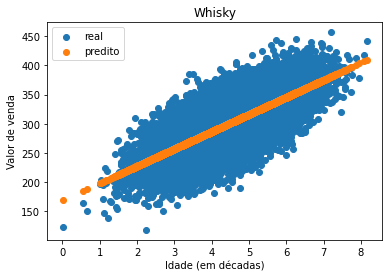

In [71]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

![](https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png)

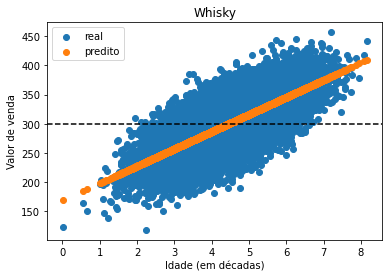

In [72]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.axhline(y_test.mean(),color='black',ls='--')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

In [73]:
sstot = sum((y_test - y_test.mean())**2)
sstot

35267645.34742966

In [74]:
ssres = sum((y_test-y_pred)**2)
ssres

18096034.202910278

In [75]:
1 - (ssres/sstot)

0.4868941766698033

In [76]:
r2_score(y_test,y_pred)

0.48689417666980284

# Plots adicionais

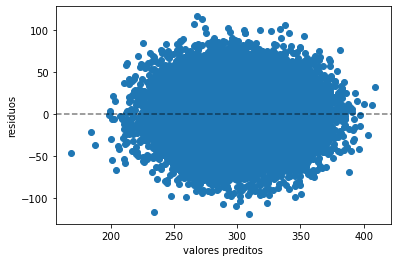

In [77]:
## plot de resíduos

f,ax = plt.subplots()
ax.scatter(y_pred,res)
ax.axhline(0,color='black',ls='--',alpha=0.5)
ax.set_xlabel('valores preditos')
ax.set_ylabel('residuos')
plt.show()

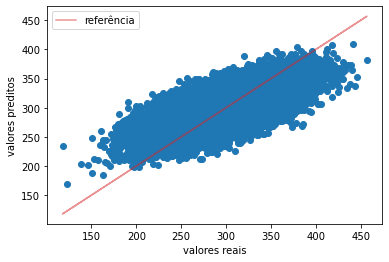

In [79]:
## plot de predições

f,ax = plt.subplots()

ax.scatter(y_test,y_pred)
ax.set_ylabel('valores preditos')
ax.set_xlabel('valores reais')
ax.plot(y_test,y_test,color='tab:red',label='referência',alpha=0.5)
plt.legend()

plt.show()